## Datathon-2: Notebook Submission
This is a template for Assignment 3 of Machine Learning Bootcamp. Please make sure you perform all tasks within the sections created. This ensures that your assignment is evaluated correctly. 


## Task 1

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Load the data and display first 5 rows.

In [2]:
cancer_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Training_set_label.csv" )
cancer_data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,19.0,8,481.5,50038,2704,11.1,0.0,"(48021.6, 51046.4]",48.4,49.6,...,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116,160.3
1,88.0,34,486.0,59399,14844,9.7,0.0,"(54545.6, 61494.5]",41.9,41.3,...,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510,194.9
2,195.0,83,475.7,39721,25164,18.5,0.0,"(37413.8, 40362.7]",48.9,47.9,...,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328,196.5
3,116.0,55,496.6,30299,17917,28.1,0.0,"[22640, 34218.1]",44.2,42.7,...,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836,230.9
4,80.0,35,372.0,39625,14058,17.4,0.0,"(37413.8, 40362.7]",45.0,42.2,...,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033,162.2


### Perform Exploratory Data Analysis

In [3]:

print(cancer_data.info())
print(cancer_data.describe())
print(cancer_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3051 non-null   float64
 1   avgDeathsPerYear         3051 non-null   int64  
 2   incidenceRate            3051 non-null   float64
 3   medIncome                3051 non-null   int64  
 4   popEst2015               3051 non-null   int64  
 5   povertyPercent           3051 non-null   float64
 6   studyPerCap              3051 non-null   float64
 7   binnedInc                3051 non-null   object 
 8   MedianAge                3051 non-null   float64
 9   MedianAgeMale            3051 non-null   float64
 10  MedianAgeFemale          3051 non-null   float64
 11  Geography                3051 non-null   object 
 12  AvgHouseholdSize         3051 non-null   float64
 13  PercentMarried           3051 non-null   float64
 14  PctNoHS18_24            

array([[<AxesSubplot:title={'center':'avgAnnCount'}>,
        <AxesSubplot:title={'center':'avgDeathsPerYear'}>,
        <AxesSubplot:title={'center':'incidenceRate'}>,
        <AxesSubplot:title={'center':'medIncome'}>,
        <AxesSubplot:title={'center':'popEst2015'}>,
        <AxesSubplot:title={'center':'povertyPercent'}>],
       [<AxesSubplot:title={'center':'studyPerCap'}>,
        <AxesSubplot:title={'center':'MedianAge'}>,
        <AxesSubplot:title={'center':'MedianAgeMale'}>,
        <AxesSubplot:title={'center':'MedianAgeFemale'}>,
        <AxesSubplot:title={'center':'AvgHouseholdSize'}>,
        <AxesSubplot:title={'center':'PercentMarried'}>],
       [<AxesSubplot:title={'center':'PctNoHS18_24'}>,
        <AxesSubplot:title={'center':'PctHS18_24'}>,
        <AxesSubplot:title={'center':'PctSomeCol18_24'}>,
        <AxesSubplot:title={'center':'PctBachDeg18_24'}>,
        <AxesSubplot:title={'center':'PctHS25_Over'}>,
        <AxesSubplot:title={'center':'PctBachDeg25_O

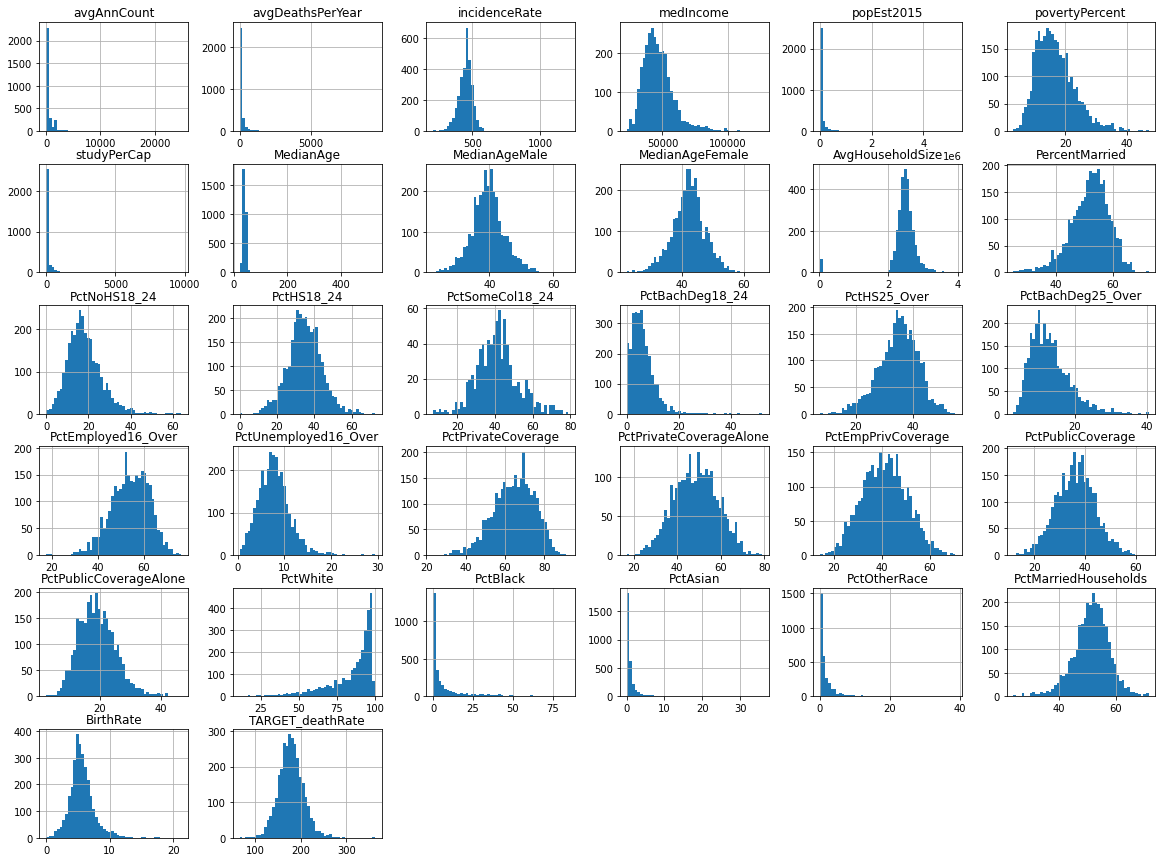

In [8]:
a=cancer_data.drop(['binnedInc','Geography'],axis=1)
a.hist(bins=50,figsize=(20,15))

### Separate the Input and Target Features of the data

In [9]:
X=cancer_data.drop(['TARGET_deathRate'], axis = 1) 
y=cancer_data['TARGET_deathRate']


### Split the data into Train and Test Sets

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=1)


## Task 2

### Perform Data Preparation Steps

In [12]:
#imputing missing values in three columns with missing values ,all of which have less than 80% missing values
# I will use pipeline 
from sklearn.preprocessing import StandardScaler
numerical_cols = [cname for cname in X_train if 
                X_train[cname].dtype in ['int64', 'float64']]
# taking categorical columns with low cardinality
categorical_cols = [cname for cname in X_train if
                    X_train[cname].nunique() < 10 and 
                    X_train[cname].dtype == "object"]
my_cols = categorical_cols + numerical_cols
X_train = X_train[my_cols].copy()
X_valid = X_valid[my_cols].copy()
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
numerical_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean',fill_value='missing')),
                                        ('std_scaler',StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent',fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


## Task 3

### Build any Machine Learning Model of your choice

In [13]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 500, random_state = 1, n_jobs = -1)
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])
clf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['avgAnnCount',
                                                   'avgDeathsPerYear',
                                                   'incidenceRate', 'medIncome',
                                                   'popEst2015',
                                                   'povertyPercent',
                                                   'studyPerCap', 'MedianAge',
                                                   'MedianAgeMale',
                                                   'MedianA

### Evaluate your model with various Evaluation Metrics

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

preds = clf.predict(X_valid)
print('MAE:', mean_absolute_error(y_valid, preds))
print('MSE:', mean_squared_error(y_valid, preds))
print('R2:', r2_score(y_valid, preds))


MAE: 9.947253027823285
MSE: 199.49868431319229
R2: 0.749597014261661


### Try out other Machine Learning Models and Evaluate them

In [40]:
# Simple and ridge linear regression .Left out decision tree given that it is kind of incorporated in random forest
from sklearn.linear_model import LinearRegression
model = LinearRegression()
reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])
reg.fit(X_train, y_train)
preds = reg.predict(X_valid)
print('MAE:', mean_absolute_error(y_valid, preds))
print('MSE:', mean_squared_error(y_valid, preds))
print('R2:', r2_score(y_valid, preds))

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.3)
model=ridge
rreg=Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])
rreg.fit(X_train, y_train)
preds = rreg.predict(X_valid)
print('MAE:', mean_absolute_error(y_valid, preds))
print('MSE:', mean_squared_error(y_valid, preds))
print('R2:', r2_score(y_valid, preds))

MAE: 13.762122946497675
MSE: 345.15304013401425
R2: 0.5667773344783573
MAE: 13.762112469101334
MSE: 345.1532128687325
R2: 0.5667771176684603


In [44]:
#Checking my X_train since I had issues with fitting of model
X_train[my_cols].copy().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2440 entries, 1810 to 1061
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2440 non-null   float64
 1   avgDeathsPerYear         2440 non-null   int64  
 2   incidenceRate            2440 non-null   float64
 3   medIncome                2440 non-null   int64  
 4   popEst2015               2440 non-null   int64  
 5   povertyPercent           2440 non-null   float64
 6   studyPerCap              2440 non-null   float64
 7   MedianAge                2440 non-null   float64
 8   MedianAgeMale            2440 non-null   float64
 9   MedianAgeFemale          2440 non-null   float64
 10  AvgHouseholdSize         2440 non-null   float64
 11  PercentMarried           2440 non-null   float64
 12  PctNoHS18_24             2440 non-null   float64
 13  PctHS18_24               2440 non-null   float64
 14  PctSomeCol18_24      

## Task 4

In [46]:
#Function for getting the best hyperparameters
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

### Perform Hyperparameter Tuning

In [48]:
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(n_estimators = 500, random_state = 1, n_jobs = -1) 

param_grid = { 
    'max_features' : ["auto", "sqrt", "log2"],
    'min_samples_split' : np.linspace(0.1, 1.0, 10),
     'max_depth' : [x for x in range(1,20)]}


from sklearn.model_selection import RandomizedSearchCV
CV_rfr = RandomizedSearchCV(estimator=RFReg, param_distributions =param_grid, n_jobs = -1, cv= 10, n_iter = 50)

clf1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', CV_rfr)
                     ])
clf1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(fill_value='missing'),
                                                  ['avgAnnCount',
                                                   'avgDeathsPerYear',
                                                   'incidenceRate', 'medIncome',
                                                   'popEst2015',
                                                   'povertyPercent',
                                                   'studyPerCap', 'MedianAge',
                                                   'MedianAgeMale',
                                                   'MedianAgeFemale',
                                                   'AvgHouseholdSize',
                                                   'PercentMarried',
                                                   'PctNoHS18_24', 'PctHS18_24',
                                 

In [50]:
CV_rfr.best_params_

{'min_samples_split': 0.1, 'max_features': 'auto', 'max_depth': 11}

In [51]:
print_results(CV_rfr)

BEST PARAMS: {'min_samples_split': 0.1, 'max_features': 'auto', 'max_depth': 11}

0.291 (+/-0.067) for {'min_samples_split': 0.30000000000000004, 'max_features': 'sqrt', 'max_depth': 12}
0.193 (+/-0.093) for {'min_samples_split': 0.5, 'max_features': 'auto', 'max_depth': 13}
0.224 (+/-0.055) for {'min_samples_split': 0.4, 'max_features': 'sqrt', 'max_depth': 2}
0.435 (+/-0.081) for {'min_samples_split': 0.1, 'max_features': 'log2', 'max_depth': 18}
-0.002 (+/-0.006) for {'min_samples_split': 0.9, 'max_features': 'sqrt', 'max_depth': 1}
-0.002 (+/-0.006) for {'min_samples_split': 0.7000000000000001, 'max_features': 'sqrt', 'max_depth': 4}
0.295 (+/-0.065) for {'min_samples_split': 0.1, 'max_features': 'log2', 'max_depth': 2}
0.221 (+/-0.056) for {'min_samples_split': 0.4, 'max_features': 'log2', 'max_depth': 12}
0.285 (+/-0.086) for {'min_samples_split': 0.30000000000000004, 'max_features': 'auto', 'max_depth': 18}
-0.002 (+/-0.006) for {'min_samples_split': 0.9, 'max_features': 'auto',

### Evaluate your model 

In [52]:
#Incorporating best hyperparameters and evelauating the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 500, random_state = 1, n_jobs = -1,max_features='auto',min_samples_split=0.1,max_depth=11)
clf2 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])
clf2.fit(X_train, y_train)

preds=clf2.predict(X_valid)
print('MAE:', mean_absolute_error(y_valid, preds))
print('MSE:', mean_squared_error(y_valid, preds))
print('R2:', r2_score(y_valid, preds))


MAE: 14.969275583178423
MSE: 391.51196694625776
R2: 0.5085894134433148


## Task 5

### Use any Feature Selection Technique and observe if the model created by selected features performs better than the previous model

In [67]:
#Randomized feature selection
from sklearn.feature_selection import RFE #importing RFE class from sklearn library
rfe = RFE(estimator=RandomForestRegressor(n_estimators = 500, random_state = 1, n_jobs = -1), step=1)
model = RandomForestRegressor(n_estimators = 500, random_state = 1, n_jobs = -1)
pipe = Pipeline([('preprocessor', preprocessor),('FeatureSelection',rfe), ('Model', model)])
pipe.fit(X_train, y_train)
rfe.support_

array([False,  True,  True,  True, False,  True, False, False, False,
        True, False, False, False,  True, False, False,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
       False,  True,  True, False])

In [68]:
pd.DataFrame(rfe.support_,index=X_train.columns,columns=['Rank'])

,Rank
avgAnnCount,False
avgDeathsPerYear,True
incidenceRate,True
medIncome,True
popEst2015,False
povertyPercent,True
studyPerCap,False
MedianAge,False
MedianAgeMale,False
MedianAgeFemale,True


In [89]:
#Using model with reduced features to make predictions
predsi=pipe.predict(X_valid)
print('MAE:', mean_absolute_error(y_valid, predsi))
print('MSE:', mean_squared_error(y_valid, predsi))
print('R2:', r2_score(y_valid, predsi))

MAE: 9.948387234042611
MSE: 200.15516928438768
R2: 0.7487730198706926


In [90]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Testing_set_label.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              762 non-null    float64
 1   avgDeathsPerYear         762 non-null    int64  
 2   incidenceRate            762 non-null    float64
 3   medIncome                762 non-null    int64  
 4   popEst2015               762 non-null    int64  
 5   povertyPercent           762 non-null    float64
 6   studyPerCap              762 non-null    float64
 7   binnedInc                762 non-null    object 
 8   MedianAge                762 non-null    float64
 9   MedianAgeMale            762 non-null    float64
 10  MedianAgeFemale          762 non-null    float64
 11  Geography                762 non-null    object 
 12  AvgHouseholdSize         762 non-null    float64
 13  PercentMarried           762 non-null    float64
 14  PctNoHS18_24             7

In [91]:
predso=pipe.predict(test_data)
res = pd.DataFrame(predso) #target is nothing but the final predictions of your model on input features of your new unseen test data
# its important for comparison. Here "test_new" is your new test dataset
res.columns = ['prediction']
res.to_csv("submission3.csv",index =False)   

C:\Users\ENKOYAOUNDE\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


That is the end of this assignment. We hope you learnt a lot along the way. 
Make sure you complete the other 2 parts (leaderboard submission and quiz) as well.

Now, download this notebook and submit it on the platform: https://dphi.tech/practice/challenge/52#notebooks 


In [92]:
predso

array([139.5328, 196.6894, 164.4568, 158.5848, 147.9402, 177.6006,
       186.4842, 163.5668, 151.2622, 179.1046, 146.087 , 194.1144,
       163.9932, 165.7658, 205.73  , 167.796 , 189.2326, 165.6052,
       163.3146, 177.5166, 176.2916, 233.4264, 168.9044, 179.6212,
       135.855 , 160.8456, 177.6818, 237.6268, 160.4426, 173.7546,
       161.0766, 169.8364, 168.0418, 168.5438, 153.485 , 164.1828,
       152.2412, 183.1474, 158.9348, 173.8406, 202.5818, 174.9096,
       176.2322, 177.4418, 162.2544, 147.7098, 164.5818, 189.8384,
       191.2462, 177.0508, 150.3802, 160.3874, 182.0298, 171.5948,
       164.8514, 189.1702, 182.9396, 196.4242, 176.7896, 161.7632,
       167.6074, 188.7968, 179.2618, 184.5342, 175.2914, 171.0088,
       184.4456, 170.2042, 185.9462, 159.9262, 197.8108, 177.7682,
       176.119 , 143.3222, 185.5938, 169.664 , 174.2806, 176.5376,
       159.275 , 189.4358, 172.2306, 159.0326, 197.2556, 177.0408,
       187.9528, 165.048 , 159.1974, 201.243 , 192.122 , 197.9

In [93]:
pwd

'C:\\Users\\ENKOYAOUNDE\\anaconda3\\Data_Science_Bootcamp-master'